In [22]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

from statsmodels.stats.outliers_influence import variance_inflation_factor

from xgboost import XGBRegressor
from catboost import CatBoostRegressor 

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [32]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_subm = pd.read_csv('sample_submission.csv')

df = pd.concat([train, test])

## Exploration Data Analysis

In [63]:
pd.set_option('display.max_columns', None)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [19]:
print("Train shape -", train.shape)
print("Test shape -", test.shape)
print("General shape -", df.shape)

Train shape - (1460, 81)
Test shape - (1459, 80)
General shape - (2919, 81)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [21]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [22]:
df.describe(include = ['object'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2915,2919,198,2919,2919,2917,2919,2919,2919,2919,2919,2919,2919,2919,2919,2918,2918,2895,2919,2919,2919,2838,2837,2837,2840,2839,2919,2919,2919,2918,2918,2917,1499,2762,2760,2760,2760,2919,10,571,105,2918,2919
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,2265,2907,120,1859,2622,2916,2133,2778,443,2511,2889,2425,1471,2310,2876,1025,1014,1742,1798,2538,1308,1283,2606,1904,851,2493,2874,1493,2723,2671,1492,2717,744,1723,1230,2604,2654,2641,4,329,95,2525,2402


In [33]:
# to make access to the columns easier
df.columns = df.columns.str.lower()
train.columns  = train.columns.str.lower()

print(train.columns)

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
       'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd',
       'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype',
       'masvnrarea', 'exterqual', 'extercond', 'foundation', 'bsmtqual',
       'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', 'electrical', '1stflrsf', '2ndflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 'paveddrive

<AxesSubplot:>

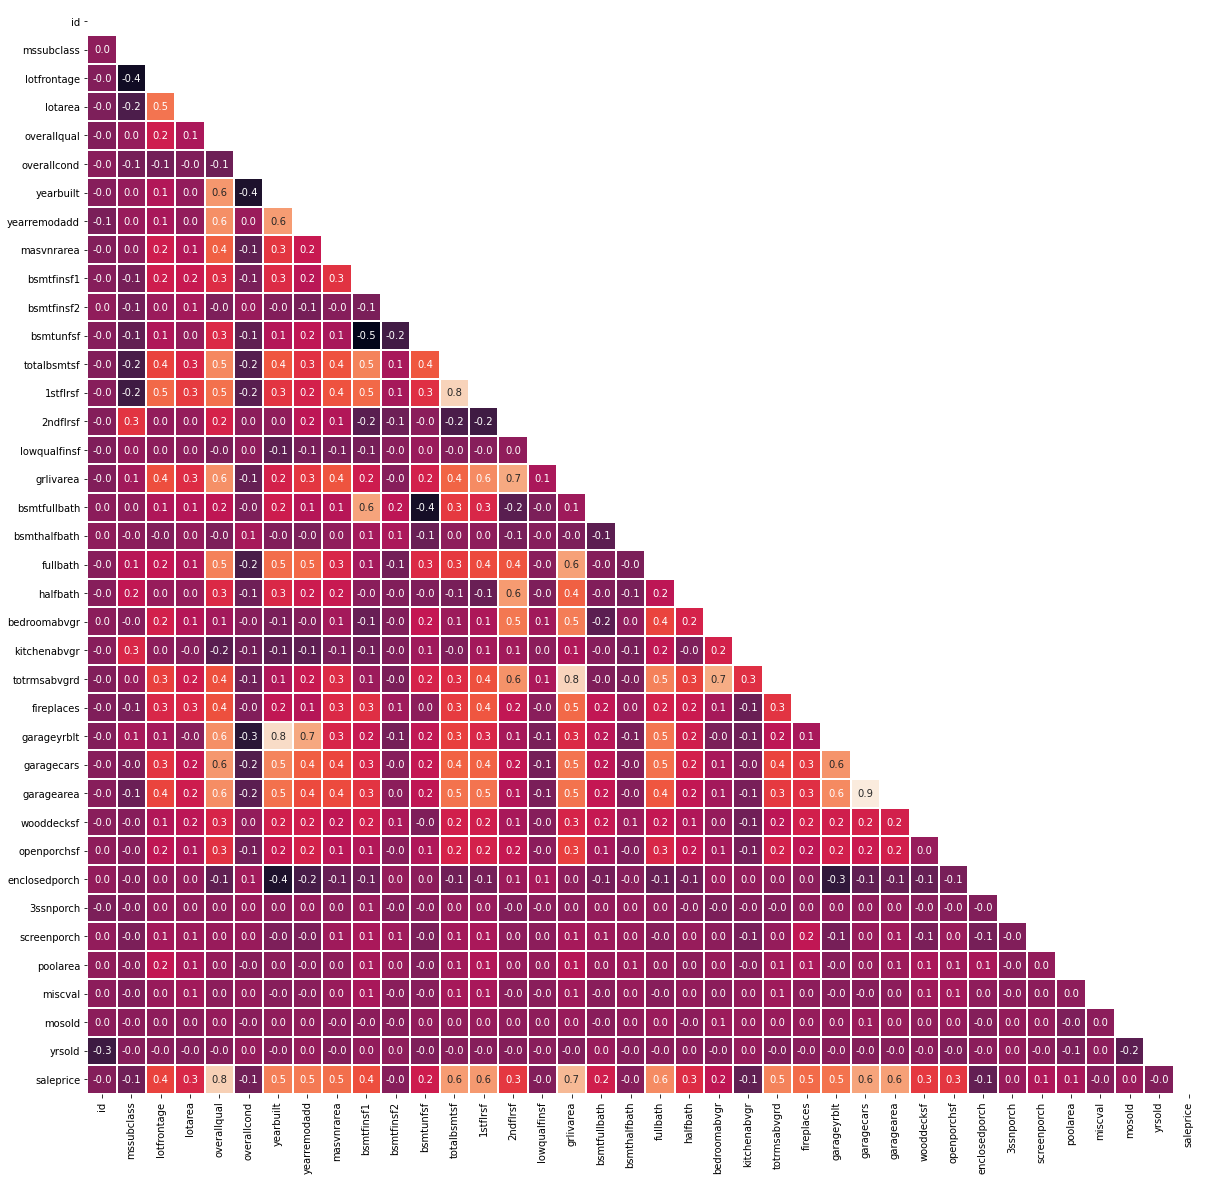

In [108]:
# look to correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(20, 20))
msk = np.triu(corr_matrix)
sns.heatmap(corr_matrix, annot=True, fmt='.1f', linewidths=1, mask = msk, cbar=False)

In [109]:
pd.set_option('display.max_row', None)
corr_matrix[['saleprice']].abs().sort_values('saleprice', ascending=False).round(2)

,saleprice
saleprice,1.00
overallqual,0.79
grlivarea,0.71
garagecars,0.64
garagearea,0.62
totalbsmtsf,0.61
1stflrsf,0.61
fullbath,0.56
totrmsabvgrd,0.53
yearbuilt,0.52


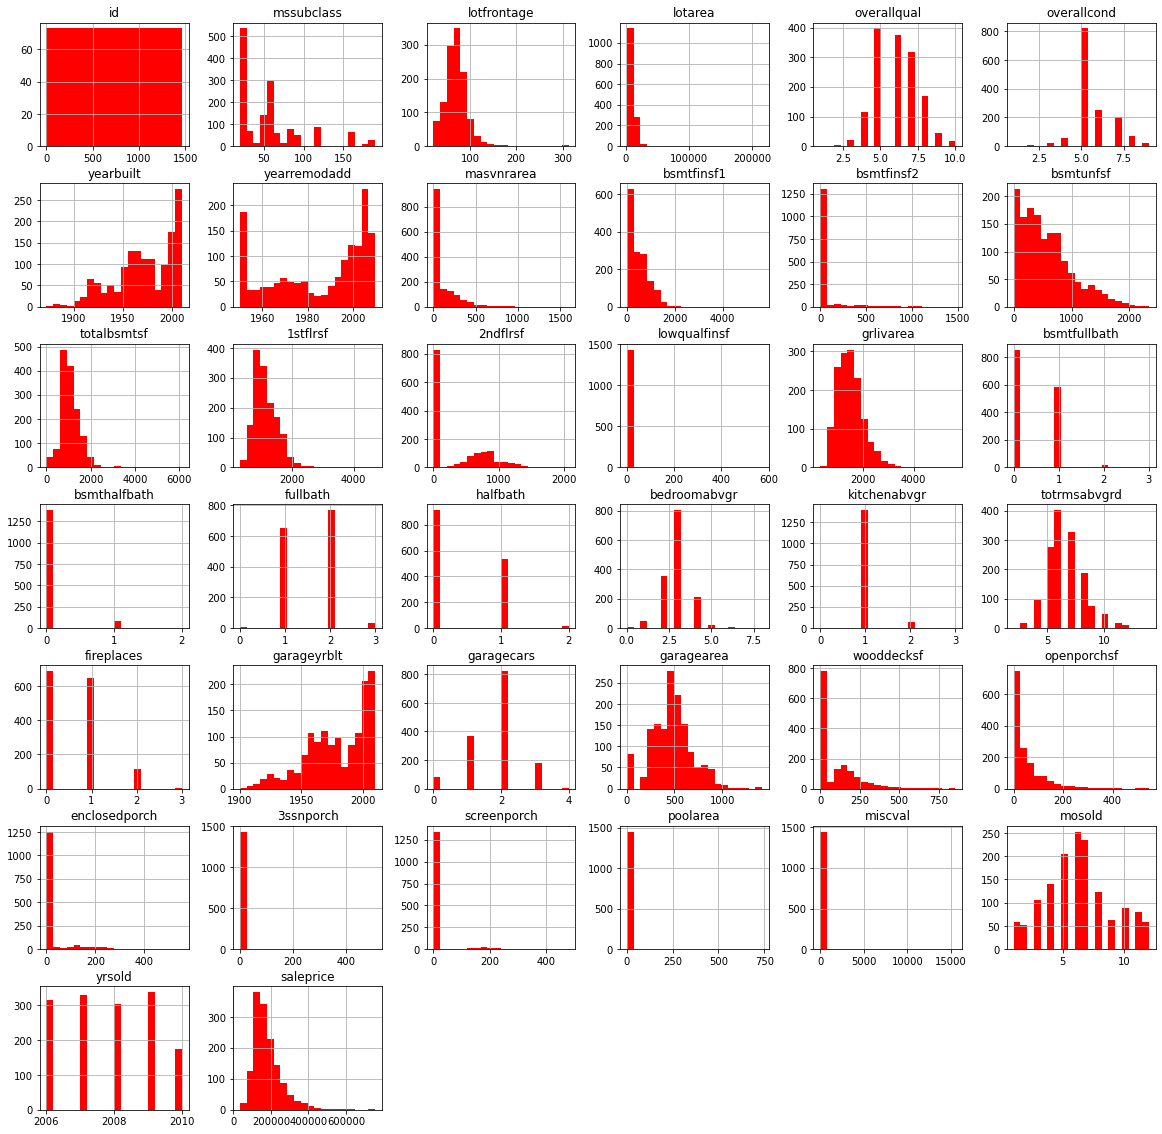

In [110]:
train.hist(figsize=(20, 20), bins = 20, color='red')
plt.show()

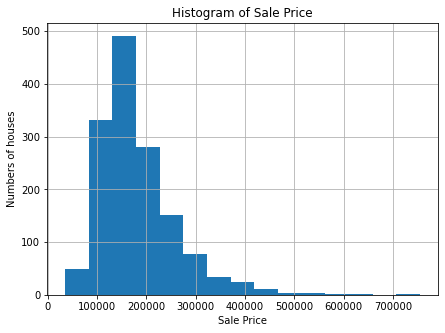

In [111]:
train['saleprice'].hist(figsize=((7, 5)), bins = 15)
plt.title('Histogram of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Numbers of houses')
plt.show()

In [112]:
train.groupby('overallqual', as_index=False)\
                    .agg({'saleprice':'mean'})\
                    .sort_values('saleprice', ascending=False)

,overallqual,saleprice
9,10,438588.388889
8,9,367513.023256
7,8,274735.535714
6,7,207716.423197
5,6,161603.034759
4,5,133523.347607
3,4,108420.655172
2,3,87473.750000
1,2,51770.333333
0,1,50150.000000


<AxesSubplot:xlabel='grlivarea', ylabel='saleprice'>

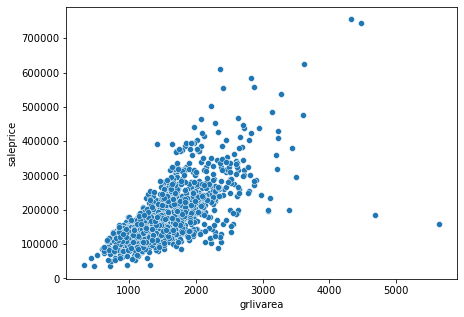

In [113]:
plt.figure(figsize= (7, 5))
sns.scatterplot(train.grlivarea, train.saleprice)

In [114]:
train.groupby('garagecars', as_index=False)\
                    .agg({'saleprice':'mean'})\
                    .sort_values('saleprice', ascending=False)

,garagecars,saleprice
3,3,309636.121547
4,4,192655.800000
2,2,183851.663835
1,1,128116.688347
0,0,103317.283951


<AxesSubplot:xlabel='yearbuilt', ylabel='saleprice'>

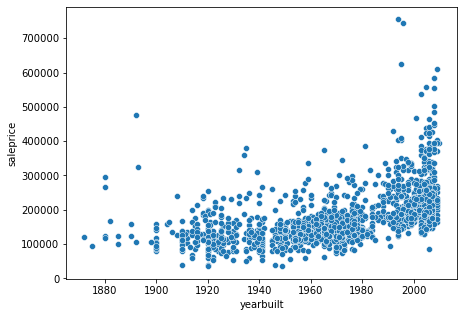

In [115]:
plt.figure(figsize = (7, 5))
sns.scatterplot(train.yearbuilt, train.saleprice)

<AxesSubplot:xlabel='yearremodadd', ylabel='saleprice'>

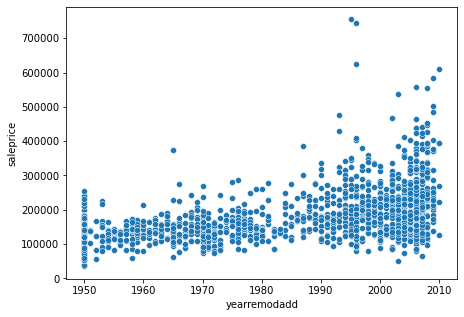

In [116]:
plt.figure(figsize = (7, 5))
sns.scatterplot(train.yearremodadd, train.saleprice)

<AxesSubplot:xlabel='yrsold', ylabel='saleprice'>

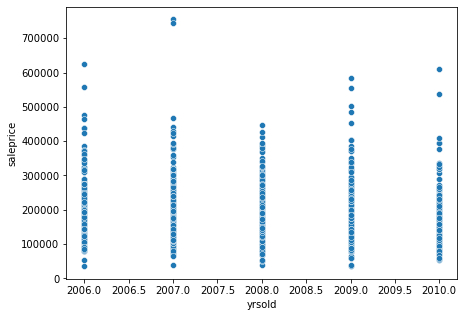

In [117]:
plt.figure(figsize = (7, 5))
sns.scatterplot(train.yrsold, train.saleprice)

<AxesSubplot:xlabel='mosold', ylabel='saleprice'>

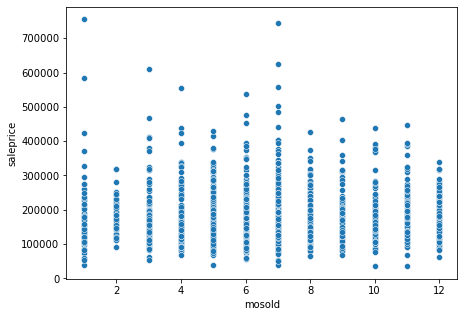

In [118]:
plt.figure(figsize = (7, 5))
sns.scatterplot(train.mosold, train.saleprice)

In [119]:
train.groupby('fireplaces', as_index=False)\
                    .agg({'saleprice':'mean'})\
                    .sort_values('saleprice', ascending=False)

,fireplaces,saleprice
3,3,252000.000000
2,2,240588.539130
1,1,211843.909231
0,0,141331.482609


In [120]:
train.groupby('fullbath', as_index=False)\
                    .agg({'saleprice':'mean'})\
                    .sort_values('saleprice', ascending=False)

,fullbath,saleprice
3,3,347822.909091
2,2,213009.825521
0,0,165200.888889
1,1,134751.440000


<AxesSubplot:xlabel='salecondition', ylabel='saleprice'>

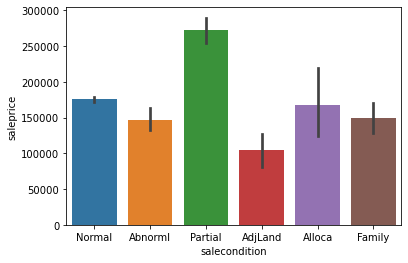

In [38]:
sns.barplot(train.salecondition, train.saleprice)

<AxesSubplot:xlabel='saletype', ylabel='saleprice'>

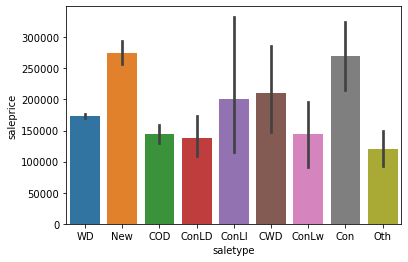

In [39]:
sns.barplot(train.saletype, train.saleprice)

<AxesSubplot:xlabel='paveddrive', ylabel='saleprice'>

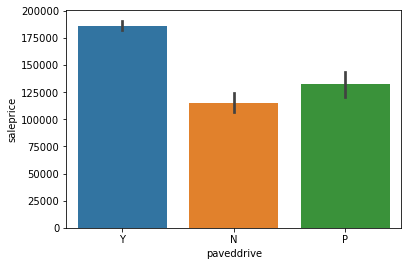

In [40]:
sns.barplot(train.paveddrive, train.saleprice)

In [14]:
float_columns = []
for column in df.columns[:-1]:
    if df[column].dtype == float:
        float_columns.append(column)
float_columns

['lotfrontage',
 'masvnrarea',
 'bsmtfinsf1',
 'bsmtfinsf2',
 'bsmtunfsf',
 'totalbsmtsf',
 'bsmtfullbath',
 'bsmthalfbath',
 'garageyrblt',
 'garagecars',
 'garagearea']

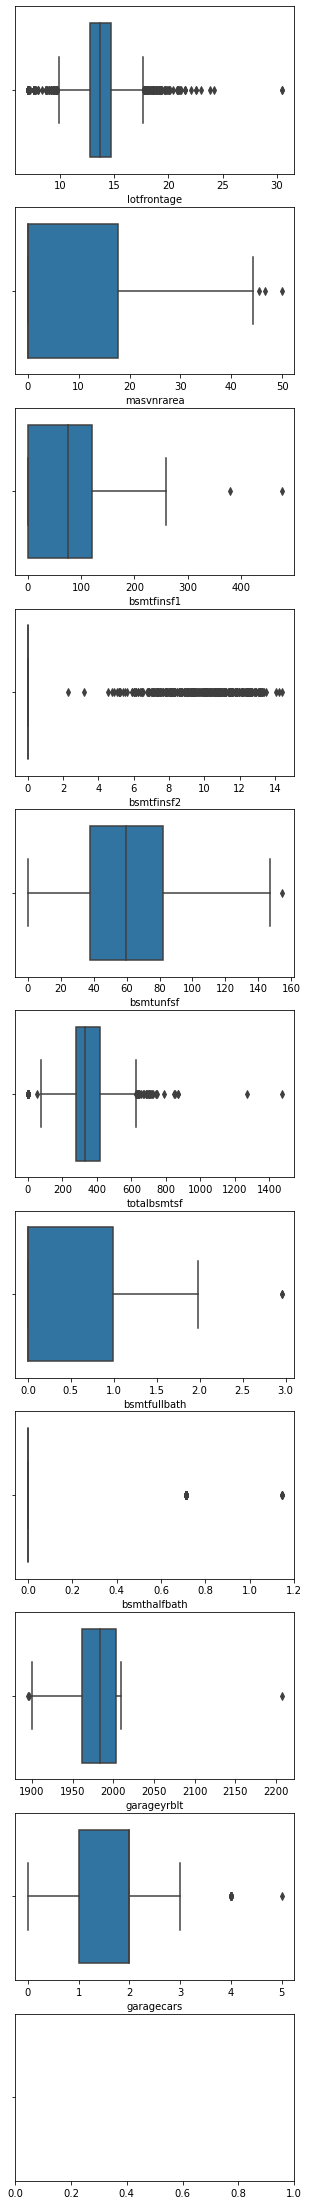

In [322]:
_, axes = plt.subplots(11, 1, sharey=True, figsize=(5, 40))
i = 0
for column in float_columns[:-1]:
    sns.boxplot(df[column], ax=axes[i])
    i +=1

In [15]:
df[float_columns].skew()
df[float_columns].kurt()

lotfrontage     13.762028
masvnrarea       9.336415
bsmtfinsf1       6.904047
bsmtfinsf2      18.844397
bsmtunfsf        0.403503
totalbsmtsf      9.122827
bsmtfullbath    -0.734512
bsmthalfbath    14.861472
garageyrblt      1.679045
garagecars       0.239194
garagearea       0.936809
dtype: float64

## Fill Missing Values and Handle Outliers

In [41]:
# columns with null values
df.isna().sum()[df.isna().sum()!=0]

mszoning           4
lotfrontage      486
alley           2721
utilities          2
exterior1st        1
exterior2nd        1
masvnrtype        24
masvnrarea        23
bsmtqual          81
bsmtcond          82
bsmtexposure      82
bsmtfintype1      79
bsmtfinsf1         1
bsmtfintype2      80
bsmtfinsf2         1
bsmtunfsf          1
totalbsmtsf        1
electrical         1
bsmtfullbath       2
bsmthalfbath       2
kitchenqual        1
functional         2
fireplacequ     1420
garagetype       157
garageyrblt      159
garagefinish     159
garagecars         1
garagearea         1
garagequal       159
garagecond       159
poolqc          2909
fence           2348
miscfeature     2814
saletype           1
saleprice       1459
dtype: int64

In [34]:
df.lotfrontage = df.lotfrontage.fillna(df.lotfrontage.mode().iloc[0])
#print('Number of nulls -', df.isna().sum().sum())

df.fireplacequ = df.fireplacequ.fillna( df.fireplacequ.mode().iloc[0] ) 
#print('Number of nulls -', df.isna().sum().sum())

few_null_columns = df.isnull().sum()[(df.isnull().sum()<200)].keys()
#print(few_null_columns)
#print('Number of nulls -', df.isna().sum().sum())

mode =  df[few_null_columns].mode()
df[few_null_columns] = df[few_null_columns].fillna(mode.iloc[0]) 
#print('Number of nulls -', df.isna().sum().sum())

median = df[few_null_columns].median() 
df[few_null_columns] = df[few_null_columns].fillna(median) 
#print('Number of nulls -', df.isna().sum().sum())

df.alley = df.alley.fillna('None')
df.fence = df.fence.fillna('None')

df = df.drop(['id', 'miscfeature', 'poolqc'], axis = 1)
print('Number of nulls -', df.isna().sum().sum())

Number of nulls - 1459


In [35]:
# because of almost all values are the same in some features, they not important. so 
# we just drop them
almost_all_values_thesame = df.describe(include = ['object']).iloc[-1]
not_informative_columns = almost_all_values_thesame[almost_all_values_thesame>2860].keys()
print(not_informative_columns)
df = df.drop(not_informative_columns, axis = 1)

Index(['street', 'utilities', 'condition2', 'roofmatl', 'heating'], dtype='object')


## Feature Creating

In [36]:
df['exists_pool'] = df['poolarea'].apply(lambda x: 1 if x > 0 else 0)
df['exists_garage'] = df['garagearea'].apply(lambda x: 1 if x > 0 else 0)
df['exists_fireplace'] = df['fireplaces'].apply(lambda x: 1 if x > 0 else 0)
df['exists_bsmt'] = df['totalbsmtsf'].apply(lambda x: 1 if x > 0 else 0)
df["exists_2ndflr"] = df["2ndflrsf"].apply(lambda x: 1 if x > 0 else 0)
df['exists_half'] = df['halfbath'].apply(lambda x: 1 if x > 0 else 0)
df['new_house'] = df['yearbuilt'].apply(lambda x: 1 if x >2000 else 0)


df["TotalHouseSF"] = df["totalbsmtsf"] + df["1stflrsf"] + df["2ndflrsf"] +\
                     df['bsmtfinsf1'] + df['bsmtfinsf2'] + +df['bsmtunfsf']+\
                     df['openporchsf'] + df['wooddecksf']


df['total_bath'] = df['fullbath'] + df['halfbath']+df['bsmtfullbath'] + df['bsmthalfbath']
                        

df['Total_Porch'] = df['3ssnporch'] + df['enclosedporch'] + df['screenporch']
                        


df = df.drop(['yearremodadd', 'yrsold', 'bsmthalfbath'], axis = 1)

In [40]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# show only categorical columns
categorical_columns = []
for column in df.columns:
    # all categorical features have type object so:
    if df[column].dtypes==object:
        categorical_columns.append(column)
        


for column in categorical_columns:
    df = pd.get_dummies(df, columns = [column])
    #df[column] = label_encoder.fit_transform(df[column])

In [39]:
df.head()

,mssubclass,mszoning,lotfrontage,lotarea,alley,lotshape,landcontour,lotconfig,landslope,neighborhood,...,exists_pool,exists_garage,exists_fireplace,exists_bsmt,exists_2ndflr,exists_half,new_house,TotalHouseSF,total_bath,Total_Porch
0,60,RL,65.0,8450,None,Reg,Lvl,Inside,Gtl,CollgCr,...,0,1,0,1,1,1,1,3483.0,4.0,0
1,20,RL,80.0,9600,None,Reg,Lvl,FR2,Gtl,Veenker,...,0,1,1,1,0,0,0,4084.0,3.0,0
2,60,RL,68.0,11250,None,IR1,Lvl,Inside,Gtl,CollgCr,...,0,1,1,1,1,1,1,3668.0,4.0,0
3,70,RL,60.0,9550,None,IR1,Lvl,Corner,Gtl,Crawfor,...,0,1,1,1,1,0,0,3264.0,2.0,272
4,60,RL,84.0,14260,None,IR1,Lvl,FR2,Gtl,NoRidge,...,0,1,1,1,1,1,0,4764.0,4.0,0


## Linear Regression

In [ ]:
X = df.drop('saleprice', axis = 1)
y = df.saleprice

sc = StandardScaler()
#X = sc.fit_transofrm(X)

In [47]:
# calculate Variance inflation factor to solve multicolinearity
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [ ]:
# by myself find features with huge VIF
calc_vif(X).sort_values('VIF').sort_values('VIF'
                                , ascending = False).head(10)

In [ ]:
# drop features with huge VIF
#X = X.drop([], axis = 1)

X_train = X.iloc[:1460]
y_train = y.iloc[:1460]
X_test = X.iloc[1460:]

In [ ]:
reg = LinearRegression()
preds = reg.fit(X_train, y_train).predict(X_test)

sample_subm.SalePrice = preds
sample_subm.to_csv('house_price_lr.csv', index=False)

## XGBoost

In [18]:
X = df.drop('saleprice', axis = 1)
y = df.saleprice

#X = sc.fit_transform(X)
X_train = X.iloc[:1460]
y_train = y.iloc[:1460]
X_test = X.iloc[1460:]

In [19]:
reg = XGBRegressor(n_estimators=500, learning_rate=0.05)
preds = reg.fit(X_train,  y_train).predict(X_test)

sample_subm.SalePrice = preds
sample_subm.to_csv('house_price_xgb.csv', index=False)

## CatBoost

In [41]:
X = df.drop('saleprice', axis = 1)
y = df.saleprice

#X = sc.fit_transform(X)
X_train = np.log1p(X.iloc[:1460])
y_train = y.iloc[:1460]
X_test = np.log1p(X.iloc[1460:])

In [42]:
reg = CatBoostRegressor()
preds = reg.fit(X_train,  y_train).predict(X_test)

sample_subm.SalePrice = preds
sample_subm.to_csv('house_price_catt.csv', index=False)

Learning rate set to 0.04175
0:	learn: 77535.9142208	total: 8.45ms	remaining: 8.44s
1:	learn: 75291.7963640	total: 14.1ms	remaining: 7.03s
2:	learn: 73181.0409616	total: 18.2ms	remaining: 6.03s
3:	learn: 71259.5467780	total: 22.7ms	remaining: 5.66s
4:	learn: 69640.5516300	total: 25.9ms	remaining: 5.15s
5:	learn: 67852.4606158	total: 28.9ms	remaining: 4.79s
6:	learn: 66100.3551803	total: 32ms	remaining: 4.54s
7:	learn: 64423.0375824	total: 36ms	remaining: 4.47s
8:	learn: 62932.3788571	total: 39.3ms	remaining: 4.33s
9:	learn: 61467.2709449	total: 42.4ms	remaining: 4.19s
10:	learn: 60081.5485845	total: 45.4ms	remaining: 4.08s
11:	learn: 58774.7940779	total: 48.6ms	remaining: 4s
12:	learn: 57373.7191843	total: 51.7ms	remaining: 3.92s
13:	learn: 56054.1664373	total: 55ms	remaining: 3.87s
14:	learn: 54742.6369333	total: 58.2ms	remaining: 3.82s
15:	learn: 53586.0325497	total: 61.2ms	remaining: 3.76s
16:	learn: 52428.5130973	total: 64.2ms	remaining: 3.71s
17:	learn: 51318.1075763	total: 67.3ms

167:	learn: 17837.4991423	total: 585ms	remaining: 2.9s
168:	learn: 17794.8083747	total: 590ms	remaining: 2.9s
169:	learn: 17766.8796614	total: 594ms	remaining: 2.9s
170:	learn: 17723.7331772	total: 598ms	remaining: 2.9s
171:	learn: 17691.9952773	total: 602ms	remaining: 2.9s
172:	learn: 17662.6543718	total: 606ms	remaining: 2.9s
173:	learn: 17626.0699338	total: 611ms	remaining: 2.9s
174:	learn: 17587.3416747	total: 616ms	remaining: 2.9s
175:	learn: 17554.0747478	total: 622ms	remaining: 2.91s
176:	learn: 17515.9569036	total: 626ms	remaining: 2.91s
177:	learn: 17490.3982268	total: 630ms	remaining: 2.91s
178:	learn: 17436.7843625	total: 634ms	remaining: 2.9s
179:	learn: 17410.2031032	total: 637ms	remaining: 2.9s
180:	learn: 17375.2159304	total: 640ms	remaining: 2.9s
181:	learn: 17349.7554389	total: 643ms	remaining: 2.89s
182:	learn: 17324.7700344	total: 647ms	remaining: 2.89s
183:	learn: 17290.1740722	total: 650ms	remaining: 2.88s
184:	learn: 17243.8985201	total: 653ms	remaining: 2.88s
185

323:	learn: 13947.0593784	total: 1.17s	remaining: 2.44s
324:	learn: 13924.3120604	total: 1.18s	remaining: 2.44s
325:	learn: 13902.0447362	total: 1.18s	remaining: 2.44s
326:	learn: 13871.5088239	total: 1.18s	remaining: 2.43s
327:	learn: 13842.6664420	total: 1.19s	remaining: 2.43s
328:	learn: 13820.5109465	total: 1.19s	remaining: 2.43s
329:	learn: 13803.2042611	total: 1.19s	remaining: 2.42s
330:	learn: 13764.3673547	total: 1.2s	remaining: 2.42s
331:	learn: 13732.7004929	total: 1.2s	remaining: 2.42s
332:	learn: 13703.4544468	total: 1.21s	remaining: 2.42s
333:	learn: 13677.8614839	total: 1.21s	remaining: 2.41s
334:	learn: 13661.2018527	total: 1.21s	remaining: 2.41s
335:	learn: 13639.6193184	total: 1.22s	remaining: 2.4s
336:	learn: 13628.5967829	total: 1.22s	remaining: 2.4s
337:	learn: 13604.8045870	total: 1.22s	remaining: 2.4s
338:	learn: 13588.8969763	total: 1.23s	remaining: 2.39s
339:	learn: 13570.0942324	total: 1.23s	remaining: 2.39s
340:	learn: 13544.8073675	total: 1.23s	remaining: 2.3

494:	learn: 11225.6174476	total: 1.75s	remaining: 1.79s
495:	learn: 11222.8931788	total: 1.76s	remaining: 1.79s
496:	learn: 11221.9714680	total: 1.77s	remaining: 1.79s
497:	learn: 11203.4820247	total: 1.77s	remaining: 1.78s
498:	learn: 11193.0790801	total: 1.77s	remaining: 1.78s
499:	learn: 11180.7894864	total: 1.78s	remaining: 1.78s
500:	learn: 11164.8944139	total: 1.78s	remaining: 1.77s
501:	learn: 11158.7788490	total: 1.78s	remaining: 1.77s
502:	learn: 11142.8793661	total: 1.79s	remaining: 1.77s
503:	learn: 11125.9330663	total: 1.79s	remaining: 1.76s
504:	learn: 11107.3033051	total: 1.79s	remaining: 1.76s
505:	learn: 11092.0766673	total: 1.8s	remaining: 1.75s
506:	learn: 11079.5772324	total: 1.8s	remaining: 1.75s
507:	learn: 11064.6455054	total: 1.8s	remaining: 1.75s
508:	learn: 11052.3655108	total: 1.81s	remaining: 1.74s
509:	learn: 11050.6434519	total: 1.81s	remaining: 1.74s
510:	learn: 11041.4658813	total: 1.81s	remaining: 1.74s
511:	learn: 11032.9232769	total: 1.82s	remaining: 1

670:	learn: 9267.7812134	total: 2.34s	remaining: 1.15s
671:	learn: 9260.9665160	total: 2.34s	remaining: 1.14s
672:	learn: 9247.5494090	total: 2.35s	remaining: 1.14s
673:	learn: 9238.0037646	total: 2.35s	remaining: 1.14s
674:	learn: 9226.6412241	total: 2.35s	remaining: 1.13s
675:	learn: 9220.8094710	total: 2.36s	remaining: 1.13s
676:	learn: 9219.3274549	total: 2.36s	remaining: 1.13s
677:	learn: 9207.9150966	total: 2.37s	remaining: 1.12s
678:	learn: 9203.8502017	total: 2.37s	remaining: 1.12s
679:	learn: 9191.9890589	total: 2.37s	remaining: 1.12s
680:	learn: 9183.6076563	total: 2.38s	remaining: 1.11s
681:	learn: 9181.2502292	total: 2.38s	remaining: 1.11s
682:	learn: 9170.3083232	total: 2.39s	remaining: 1.11s
683:	learn: 9162.4771772	total: 2.39s	remaining: 1.1s
684:	learn: 9160.6510506	total: 2.4s	remaining: 1.1s
685:	learn: 9153.0807528	total: 2.4s	remaining: 1.1s
686:	learn: 9148.6196699	total: 2.4s	remaining: 1.09s
687:	learn: 9138.7051299	total: 2.41s	remaining: 1.09s
688:	learn: 9125

827:	learn: 7834.3253965	total: 2.93s	remaining: 608ms
828:	learn: 7828.9486997	total: 2.93s	remaining: 605ms
829:	learn: 7818.8918506	total: 2.94s	remaining: 601ms
830:	learn: 7809.1738178	total: 2.94s	remaining: 598ms
831:	learn: 7799.4311871	total: 2.94s	remaining: 594ms
832:	learn: 7789.0865038	total: 2.95s	remaining: 591ms
833:	learn: 7779.0115681	total: 2.95s	remaining: 587ms
834:	learn: 7771.1219231	total: 2.95s	remaining: 583ms
835:	learn: 7760.8444475	total: 2.96s	remaining: 580ms
836:	learn: 7748.2192076	total: 2.96s	remaining: 576ms
837:	learn: 7744.1481558	total: 2.96s	remaining: 573ms
838:	learn: 7734.7375283	total: 2.96s	remaining: 569ms
839:	learn: 7729.5705379	total: 2.97s	remaining: 566ms
840:	learn: 7718.5793144	total: 2.97s	remaining: 562ms
841:	learn: 7706.7684632	total: 2.98s	remaining: 558ms
842:	learn: 7698.5409584	total: 2.98s	remaining: 555ms
843:	learn: 7686.8150250	total: 2.98s	remaining: 551ms
844:	learn: 7684.5107206	total: 2.98s	remaining: 548ms
845:	learn

987:	learn: 6709.3009137	total: 3.52s	remaining: 42.7ms
988:	learn: 6701.6627564	total: 3.52s	remaining: 39.2ms
989:	learn: 6695.1338886	total: 3.53s	remaining: 35.6ms
990:	learn: 6693.7789754	total: 3.53s	remaining: 32.1ms
991:	learn: 6684.7036082	total: 3.54s	remaining: 28.5ms
992:	learn: 6682.0254977	total: 3.54s	remaining: 24.9ms
993:	learn: 6674.1300806	total: 3.54s	remaining: 21.4ms
994:	learn: 6664.9279322	total: 3.54s	remaining: 17.8ms
995:	learn: 6654.8093378	total: 3.55s	remaining: 14.3ms
996:	learn: 6650.9133588	total: 3.55s	remaining: 10.7ms
997:	learn: 6644.1767164	total: 3.56s	remaining: 7.13ms
998:	learn: 6638.0577009	total: 3.56s	remaining: 3.56ms
999:	learn: 6631.3536615	total: 3.56s	remaining: 0us


In [ ]:
# use GSCV to find best params
params = {'depth': [1, 5, 10],
          'learning_rate' : [0.05, 0.1, 0.15],
         'l2_leaf_reg': [1,4,9],
         'iterations': [500]}
rfr = RandomForestRegressor()
grid = GridSearchCV(cat, param_grid=params, scoring="neg_root_mean_squared_error", cv = 3,
                    verbose = 2)
grid.fit(X_train, y_train)

In [ ]:
best_grid = grid.best_estimator_
preds = best_grid.fit(X_train, y_train).predict(X_test)


sample_subm.SalePrice = preds
sample_subm.to_csv('house_price_cat.csv', index=False)

In [91]:
reg.best_params_

{'depth': 7, 'iterations': 300, 'l2_leaf_reg': 9, 'learning_rate': 0.15}

In [160]:
sample_subm

,Id,SalePrice
0,1461,124319.455334
1,1462,162688.552341
2,1463,187182.759548
3,1464,192011.499083
4,1465,177274.925238
5,1466,172769.166247
6,1467,175381.622854
7,1468,166248.078471
8,1469,184275.938706
9,1470,129214.802839


In [34]:
model = GradientBoostingRegressor()
preds = model.fit(X_train,  y_train).predict(X_test)

sample_subm.SalePrice = preds
sample_subm.to_csv('house_price_catt.csv', index=False)